In [1]:
import ReactionNBurguers
import numpy as np
from scipy.signal import lombscargle
import matplotlib.pyplot as plt

## 1. Paper parameters

The following configuration is set to the formation of spirals.

### 1.1. Topological deformation configuration
The Noise is constant over the system iteration ($\kappa$ parameter) 

In [8]:
# beta = 2 -> red noise
# beta = 1 -> pink noise
# beta = 0 -> white noise

beta = 2
rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2,mu_v=1.0,r=5.3,s_u=0,s_v=0,e1=0.35,b=0.1,kappa=0.0,
                                          noiseType='colored',h=6,
                                          mNoise='diffusion',noiseArgs= {'beta':beta, 'std':0.01},msize=128)

Stable (u*,v*):  0.1861455150532504 0.3861455150532504


### 1.2. Dark Matter like configuration
The Noise changes over time ($\kappa$ parameter) 

In [ ]:
# beta = 2 -> red noise
# beta = 1 -> pink noise
# beta = 0 -> white noise

beta = 2
rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2,mu_v=1.0,r=5.3,s_u=0,s_v=0,e1=0.35,b=0.1,kappa=1.0,
                                          noiseType='colored',h=6,
                                          mNoise='diffusion',noiseArgs= {'beta':beta, 'std':0.1},msize=128)

## 2. Reaction dynamic

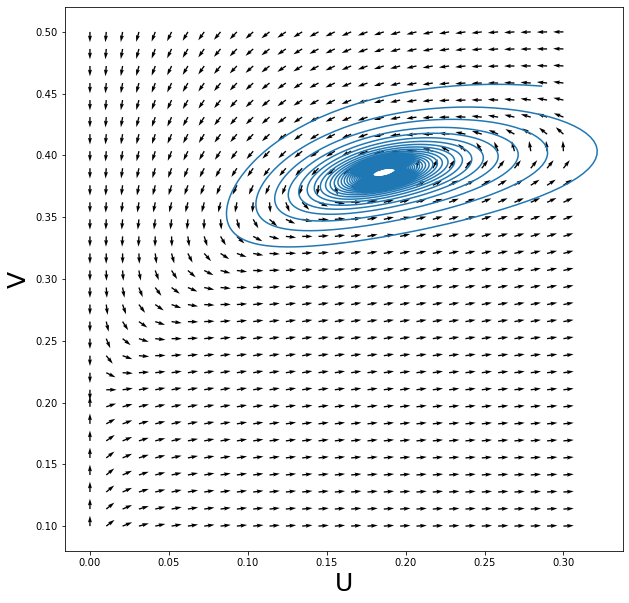

In [14]:
x,y = np.meshgrid(np.linspace(0,0.3,30),np.linspace(0.1,0.5,30))
dx,dy = rdb.reaction(x,y,0)

u0,v0 = rdb.u0+0.1,rdb.v0+0.07
itx,ity = rdb.getChainedSingleReaction(u0,v0)

mod = (dx**2+dy**2)**0.5
mod[mod<1e-15] = 1
plt.figure(figsize=(10,10))
plt.quiver(x,y,dx/mod,dy/mod)
plt.plot(itx,ity)
plt.xlabel("U",fontsize=25)
plt.ylabel("V",fontsize=25)
#plt.title("Reaction Dynamic")
plt.show()

## 3. Solving System

In [9]:
data,times = rdb.solveRKF45(dt=0.25,ntimes=3000,stepsave=np.arange(0,4000),dtTolerace=1e-3)
data.shape

100%|██████████| 3000/3000 [01:20<00:00, 37.28it/s]


(3001, 2, 128, 128)

0.25


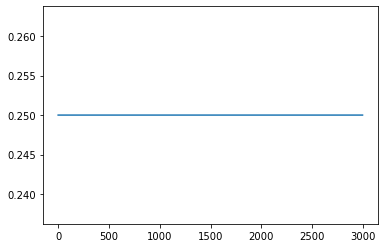

In [6]:
dt = times-np.roll(times,1)
dt = dt[2:]
print(np.min(dt))
plt.figure()
plt.plot(dt)
plt.show()

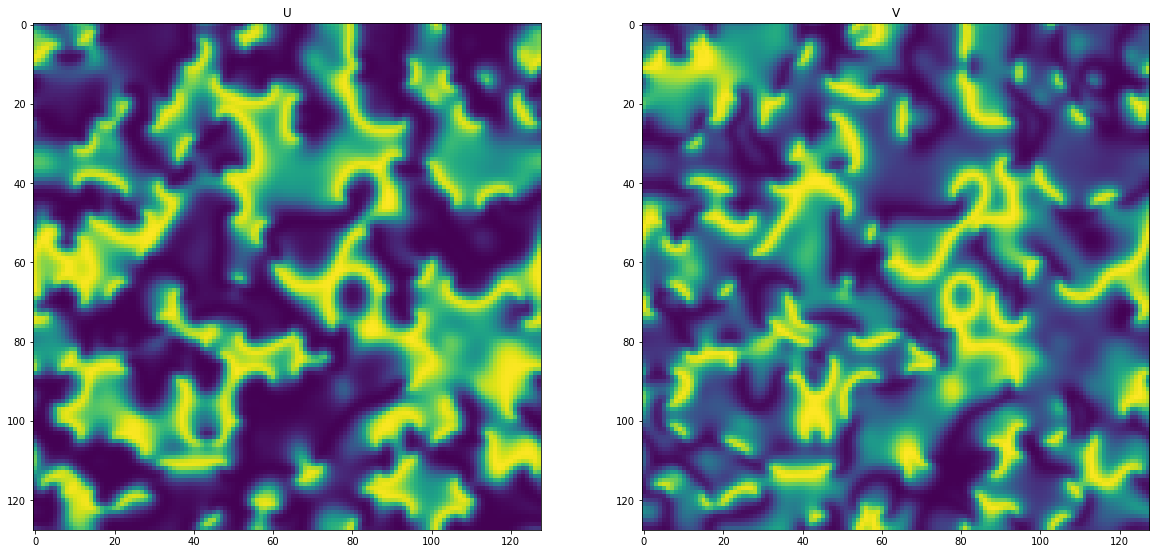

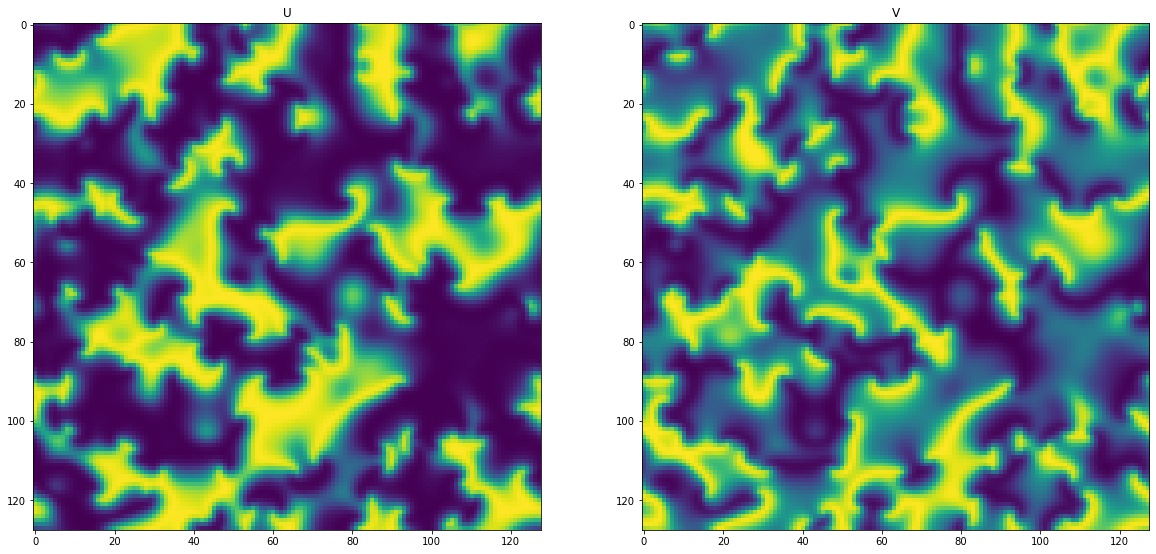

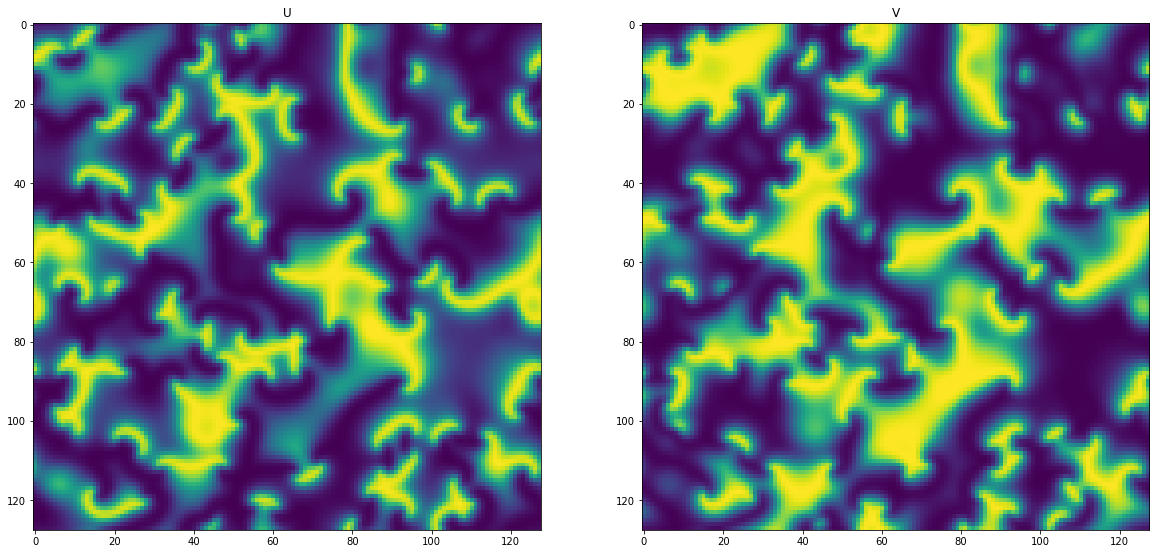

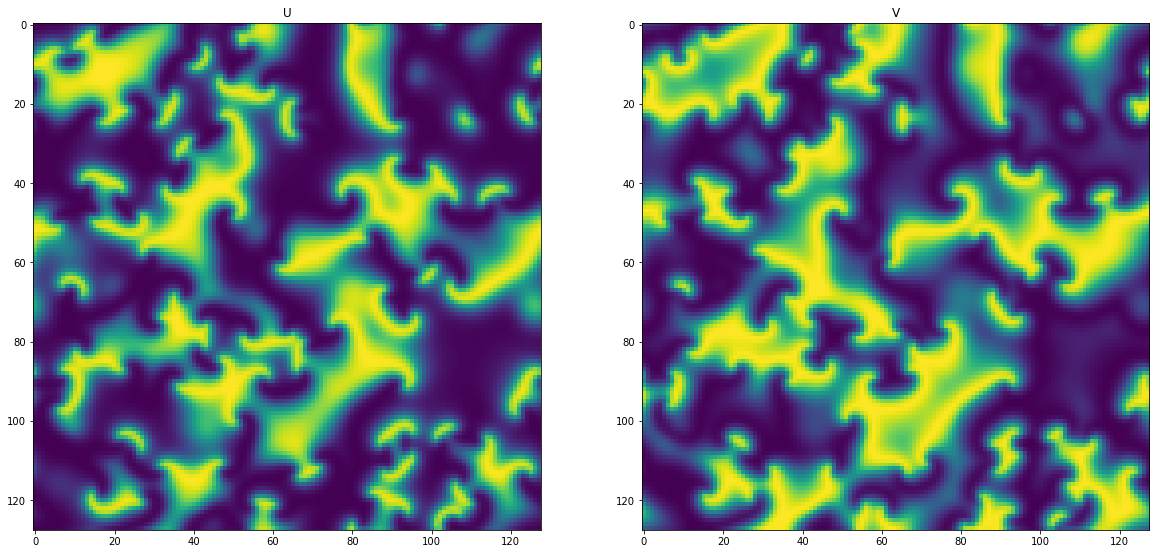

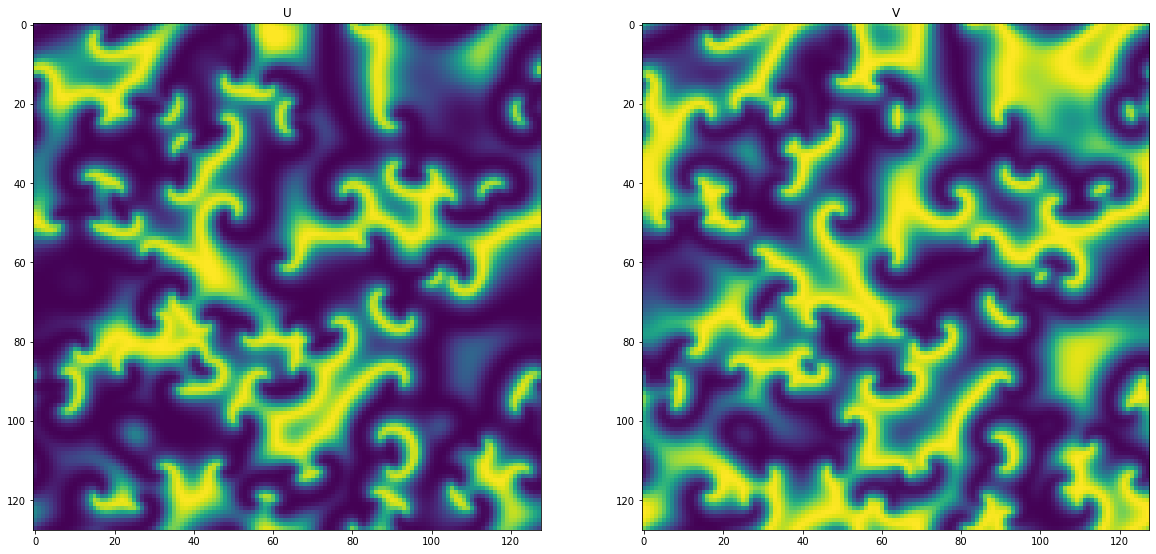

In [10]:
plt.figure(figsize=(20,10))
time = 750
plt.subplot(1,2,1)
plt.title("U")
plt.imshow(data[time,0,:,:])
plt.subplot(1,2,2)
plt.title("V")
plt.imshow(data[time,1,:,:])

plt.figure(figsize=(20,10))
time = 1000
plt.subplot(1,2,1)
plt.title("U")
plt.imshow(data[time,0,:,:])
plt.subplot(1,2,2)
plt.title("V")
plt.imshow(data[time,1,:,:])

plt.figure(figsize=(20,10))
time = 1300
plt.subplot(1,2,1)
plt.title("U")
plt.imshow(data[time,0,:,:])
plt.subplot(1,2,2)
plt.title("V")
plt.imshow(data[time,1,:,:])

plt.figure(figsize=(20,10))
time = 1500
plt.subplot(1,2,1)
plt.title("U")
plt.imshow(data[time,0,:,:])
plt.subplot(1,2,2)
plt.title("V")
plt.imshow(data[time,1,:,:])

plt.figure(figsize=(20,10))
time = 2600
plt.subplot(1,2,1)
plt.title("U")
plt.imshow(data[time,0,:,:])
plt.subplot(1,2,2)
plt.title("V")
plt.imshow(data[time,1,:,:])

plt.show()

In [21]:
np.save("data/constantSpira.npy",data)
np.save("data/timeVoids.npy",times)

## Plots, GPA, etc....

In [2]:
from GPA import GPA
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import tqdm as tqdm

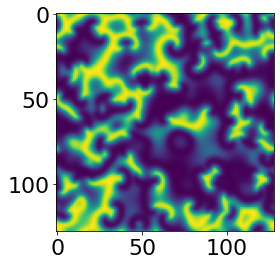

In [89]:
data = np.load("data/Scaling/scaling.npy")
plt.figure()
plt.imshow(data[len(data)-500,0])
plt.show()

In [3]:
ga = GPA(0.05)
g2s,g2a = [],[]
for i in tqdm.tqdm(range(0,len(data),1)):
    res = ga(data[i,0],moment=["G2"],symmetrycalGrad='A')
    g2a.append(res["G2"])
    res = ga(data[i,0],moment=["G2"],symmetrycalGrad='S')
    g2s.append(res["G2"])

100%|██████████| 3001/3001 [16:32<00:00,  3.02it/s]


In [20]:
np.save("data/Scaling/g2aScaling.npy",g2a)
np.save("data/Scaling/g2sScaling.npy",g2s)

In [5]:
g2a = np.load("data/Scaling/g2aScaling.npy")
g2s = np.load("data/Scaling/g2sScaling.npy")

In [91]:
freqs = np.fft.fftfreq(len(g2a))
seq = np.argsort(freqs)
psda = np.fft.fft(g2a)
psda = (psda*np.conj(psda)).real 
psds = np.fft.fft(g2s)
psds = (psds*np.conj(psds)).real 

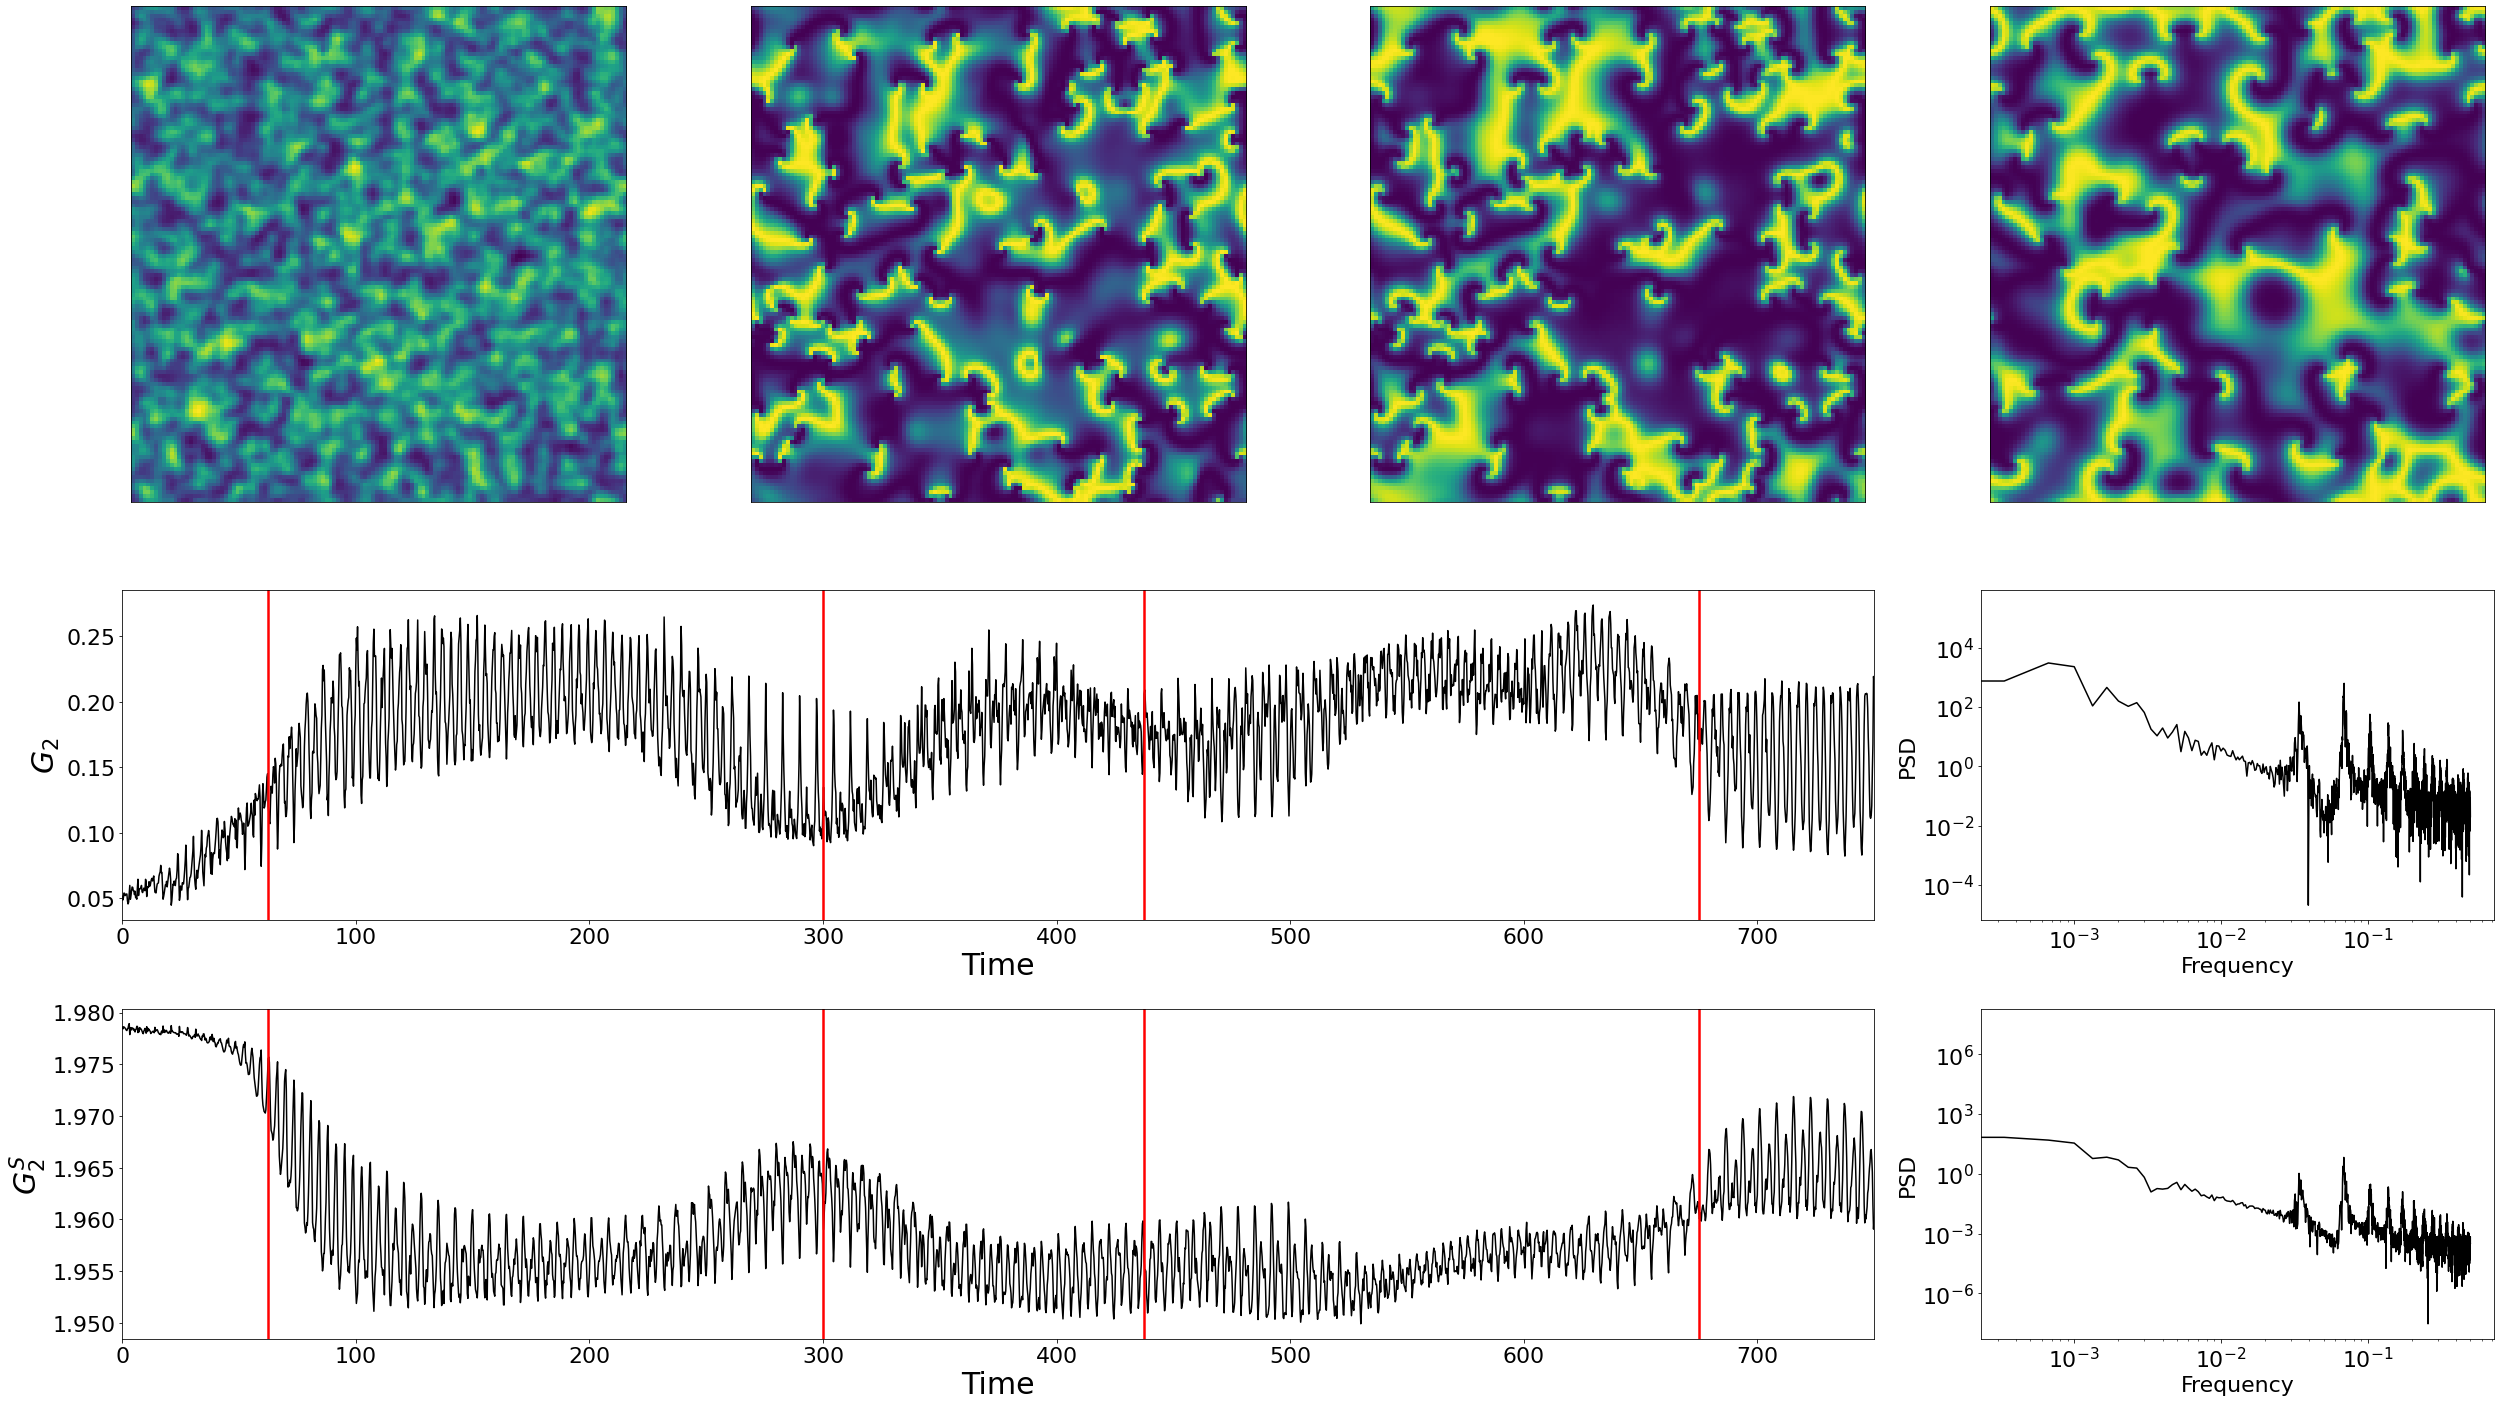

In [94]:
plt.figure(figsize=(35,20))
gs = gridspec.GridSpec(3, 4,height_ratios=[1.5,1.0,1.0])
x = 0.25*np.arange(0,len(g2a))
matplotlib.rcParams.update({'font.size': 22})

#snapshots: 
plt.subplot(gs[0:1,0])
plt.imshow(data[250,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,1])
plt.imshow(data[1200,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,2])
plt.imshow(data[1750,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,3])
plt.imshow(data[2700,0])
plt.xticks([])
plt.yticks([])

# serie temporal
plt.subplot(gs[1,:3])
#plt.plot(x,g2a)
plt.plot(x,g2a,label="G_2",color='k')
plt.xlim(0,max(x))
plt.axvline(250*0.25,color='r',lw=2.5)
plt.axvline(1200*0.25,color='r',lw=2.5)
plt.axvline(1750*0.25,color='r',lw=2.5)
plt.axvline(2700*0.25,color='r',lw=2.5)
plt.xlabel("Time",fontsize=30)
plt.ylabel("$G_2$",fontsize=30)

# PSD
ax = plt.subplot(gs[1,3])
ax.loglog(freqs[seq],psda[seq],color='k')
plt.ylabel("PSD")
plt.xlabel("Frequency")

# serie temporal
plt.subplot(gs[2,:3])
#plt.plot(x,g2a)
plt.plot(x,g2s,label="G^S_2",color='k')
plt.xlim(0,max(x))
plt.axvline(250*0.25,color='r',lw=2.5)
plt.axvline(1200*0.25,color='r',lw=2.5)
plt.axvline(1750*0.25,color='r',lw=2.5)
plt.axvline(2700*0.25,color='r',lw=2.5)
plt.xlabel("Time",fontsize=30)
plt.ylabel("$G^S_2$",fontsize=30)

# PSD
plt.subplot(gs[2,3])
plt.loglog(freqs[seq],psds[seq],color='k')
plt.ylabel("PSD")
plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

----

In [1]:
from GPA import GPA
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import tqdm as tqdm

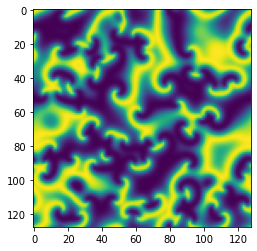

In [2]:
data = np.load("data/constantScaling/constantScaling.npy")
plt.figure()
plt.imshow(data[len(data)-500,0])
plt.show()

In [3]:
ga = GPA(0.05)
g2s,g2a = [],[]
for i in tqdm.tqdm(range(0,len(data),1)):
    res = ga(data[i,0],moment=["G2"],symmetrycalGrad='A')
    g2a.append(res["G2"])
    res = ga(data[i,0],moment=["G2"],symmetrycalGrad='S')
    g2s.append(res["G2"])

100%|██████████| 3001/3001 [17:59<00:00,  2.78it/s]


In [4]:
np.save("data/constantScaling/g2aScaling.npy",g2a)
np.save("data/constantScaling/g2sScaling.npy",g2s)

In [5]:
freqs = np.fft.fftfreq(len(g2a))
seq = np.argsort(freqs)
psda = np.fft.fft(g2a)
psda = (psda*np.conj(psda)).real 
psds = np.fft.fft(g2s)
psds = (psds*np.conj(psds)).real 

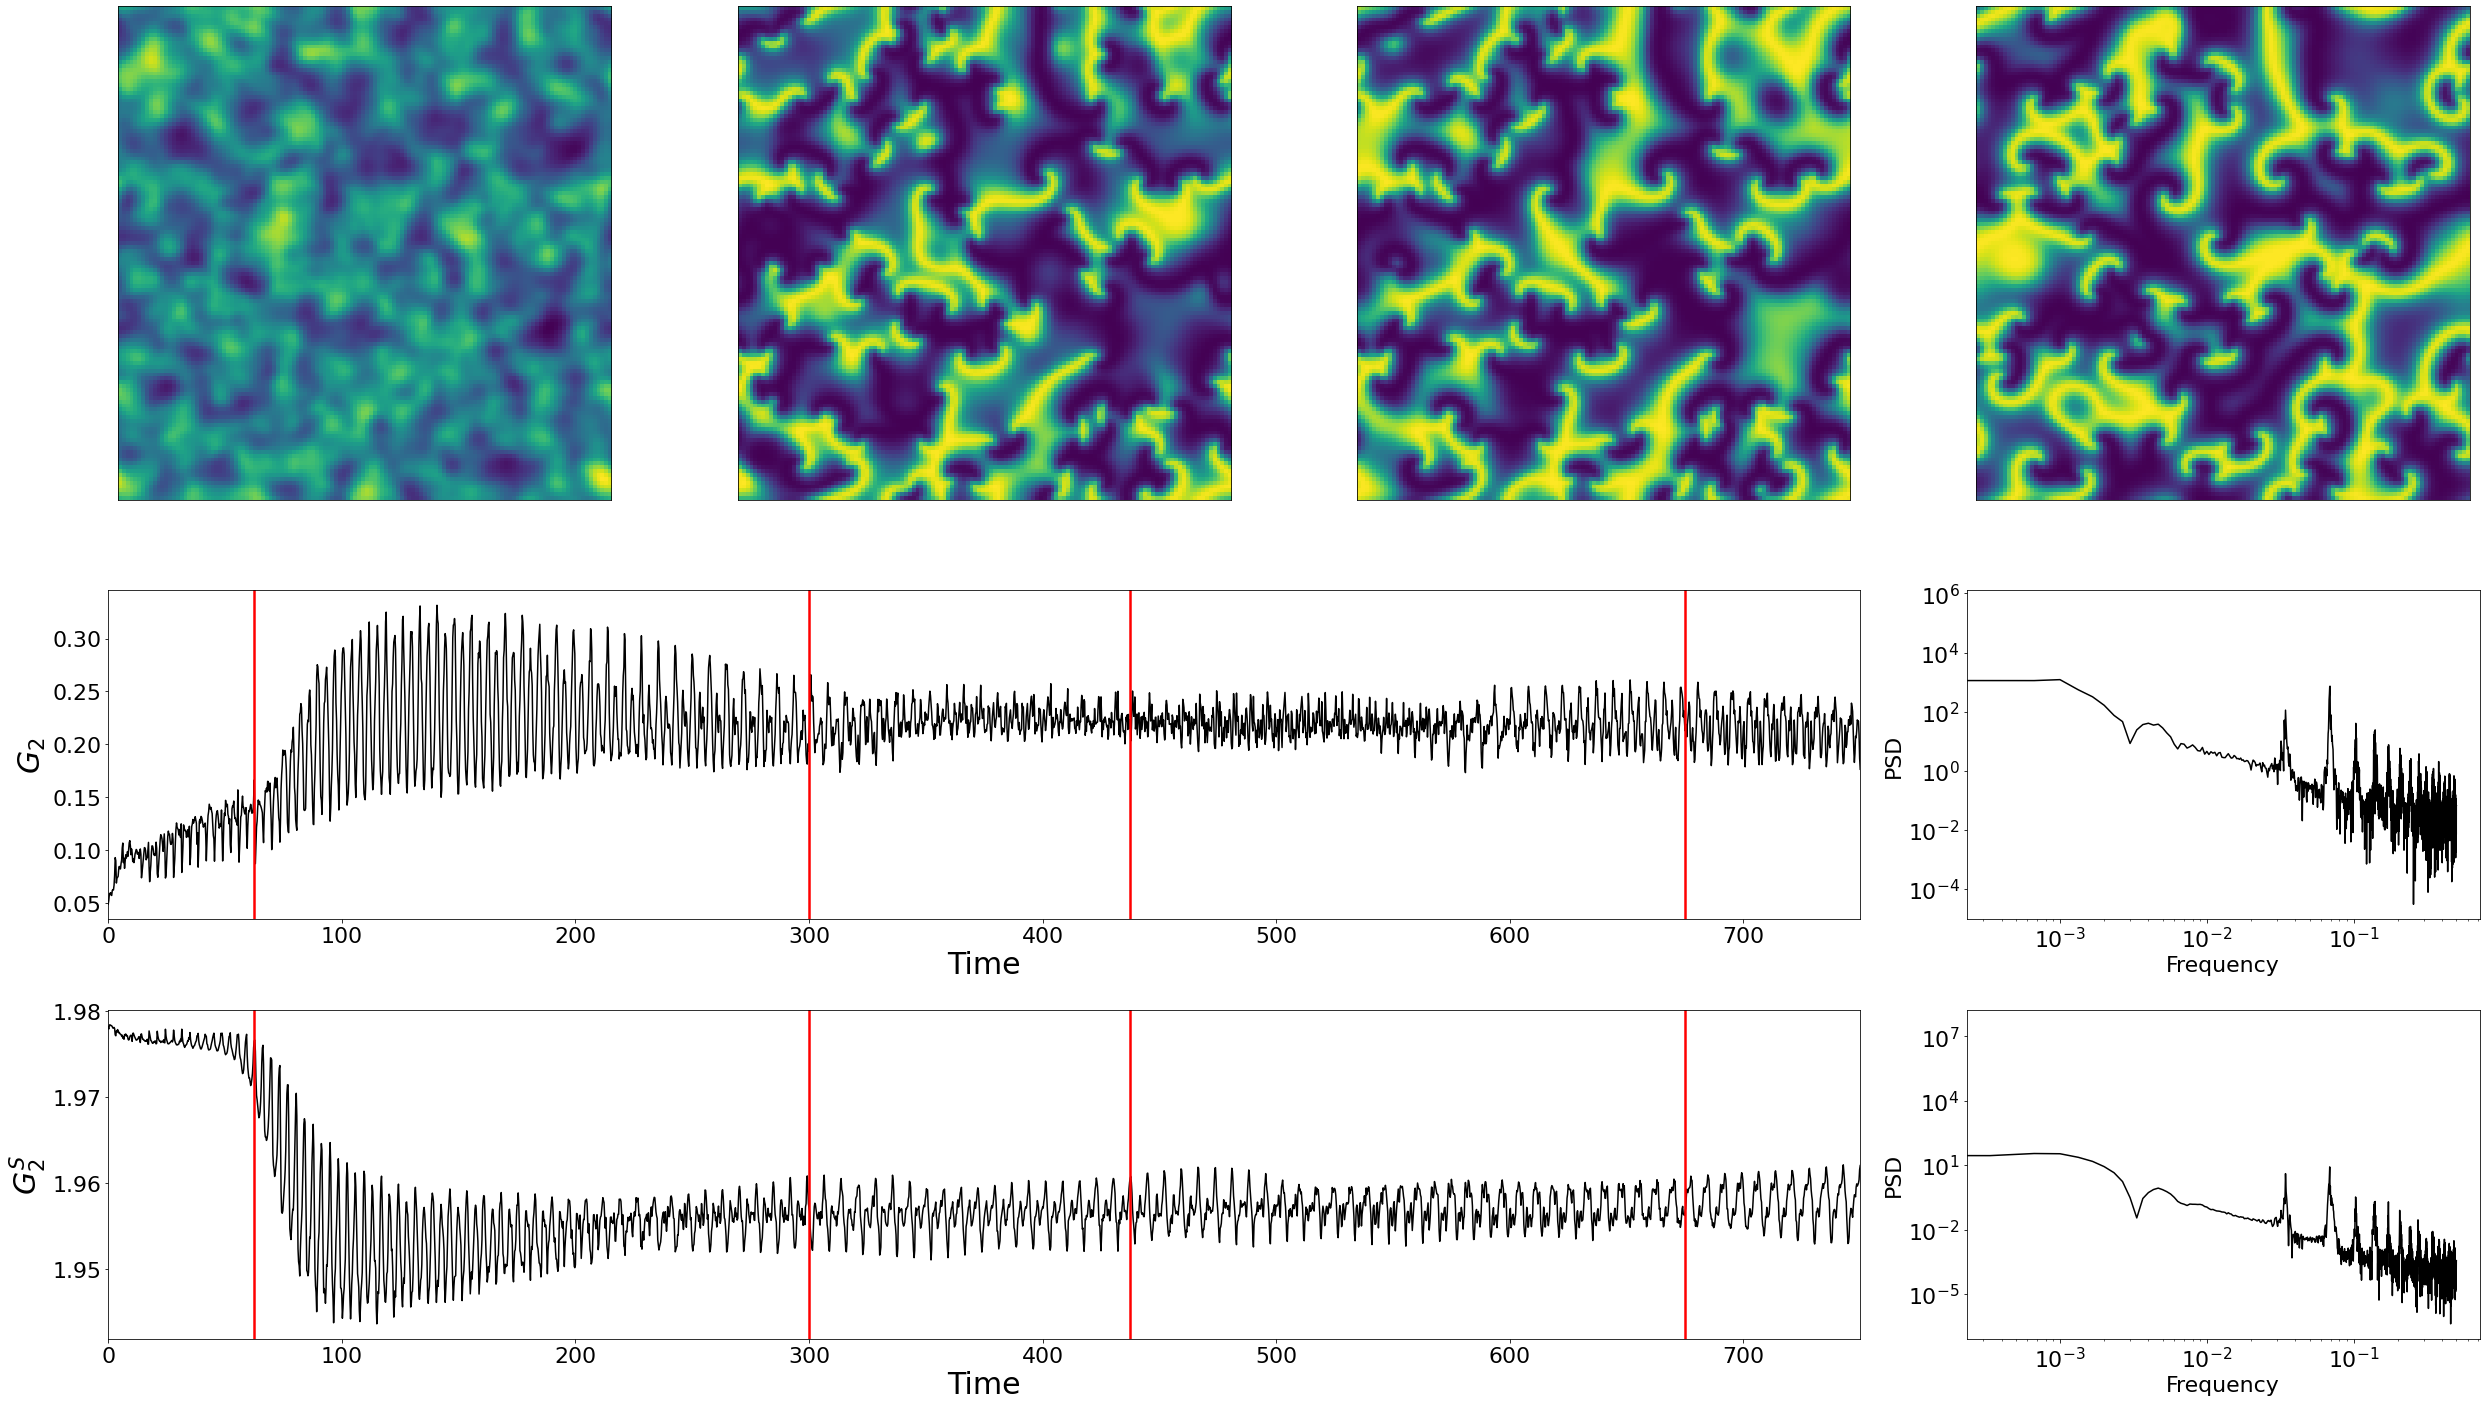

In [6]:
plt.figure(figsize=(35,20))
gs = gridspec.GridSpec(3, 4,height_ratios=[1.5,1.0,1.0])
x = 0.25*np.arange(0,len(g2a))
matplotlib.rcParams.update({'font.size': 22})

#snapshots: 
plt.subplot(gs[0:1,0])
plt.imshow(data[250,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,1])
plt.imshow(data[1200,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,2])
plt.imshow(data[1750,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,3])
plt.imshow(data[2700,0])
plt.xticks([])
plt.yticks([])

# serie temporal
plt.subplot(gs[1,:3])
#plt.plot(x,g2a)
plt.plot(x,g2a,label="G_2",color='k')
plt.xlim(0,max(x))
plt.axvline(250*0.25,color='r',lw=2.5)
plt.axvline(1200*0.25,color='r',lw=2.5)
plt.axvline(1750*0.25,color='r',lw=2.5)
plt.axvline(2700*0.25,color='r',lw=2.5)
plt.xlabel("Time",fontsize=30)
plt.ylabel("$G_2$",fontsize=30)

# PSD
ax = plt.subplot(gs[1,3])
ax.loglog(freqs[seq],psda[seq],color='k')
plt.ylabel("PSD")
plt.xlabel("Frequency")

# serie temporal
plt.subplot(gs[2,:3])
#plt.plot(x,g2a)
plt.plot(x,g2s,label="G^S_2",color='k')
plt.xlim(0,max(x))
plt.axvline(250*0.25,color='r',lw=2.5)
plt.axvline(1200*0.25,color='r',lw=2.5)
plt.axvline(1750*0.25,color='r',lw=2.5)
plt.axvline(2700*0.25,color='r',lw=2.5)
plt.xlabel("Time",fontsize=30)
plt.ylabel("$G^S_2$",fontsize=30)

# PSD
plt.subplot(gs[2,3])
plt.loglog(freqs[seq],psds[seq],color='k')
plt.ylabel("PSD")
plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

----

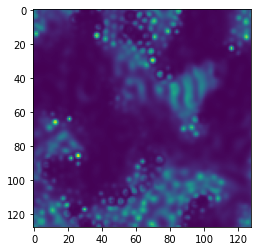

In [3]:
data = np.load("data/voids/voids.npy")
plt.figure()
plt.imshow(data[len(data)-50,0])
plt.show()

In [4]:
ga = GPA(0.05)
g2s,g2a = [],[]
for i in tqdm.tqdm(range(0,len(data),1)):
    res = ga(data[i,0],moment=["G2"],symmetrycalGrad='A')
    g2a.append(res["G2"])
    res = ga(data[i,0],moment=["G2"],symmetrycalGrad='S')
    g2s.append(res["G2"])

100%|██████████| 3001/3001 [08:37<00:00,  5.80it/s]


In [5]:
np.save("data/voids/g2aVoids.npy",g2a)
np.save("data/voids/g2sVoids.npy",g2s)

In [97]:
g2a = np.load("data/WavesVoids/g2aWaves.npy")
g2s = np.load("data/WavesVoids/g2sWaves.npy")

In [6]:
freqs = np.fft.fftfreq(len(g2a))
seq = np.argsort(freqs)
psda = np.fft.fft(g2a)
psda = (psda*np.conj(psda)).real 
psds = np.fft.fft(g2s)
psds = (psds*np.conj(psds)).real 

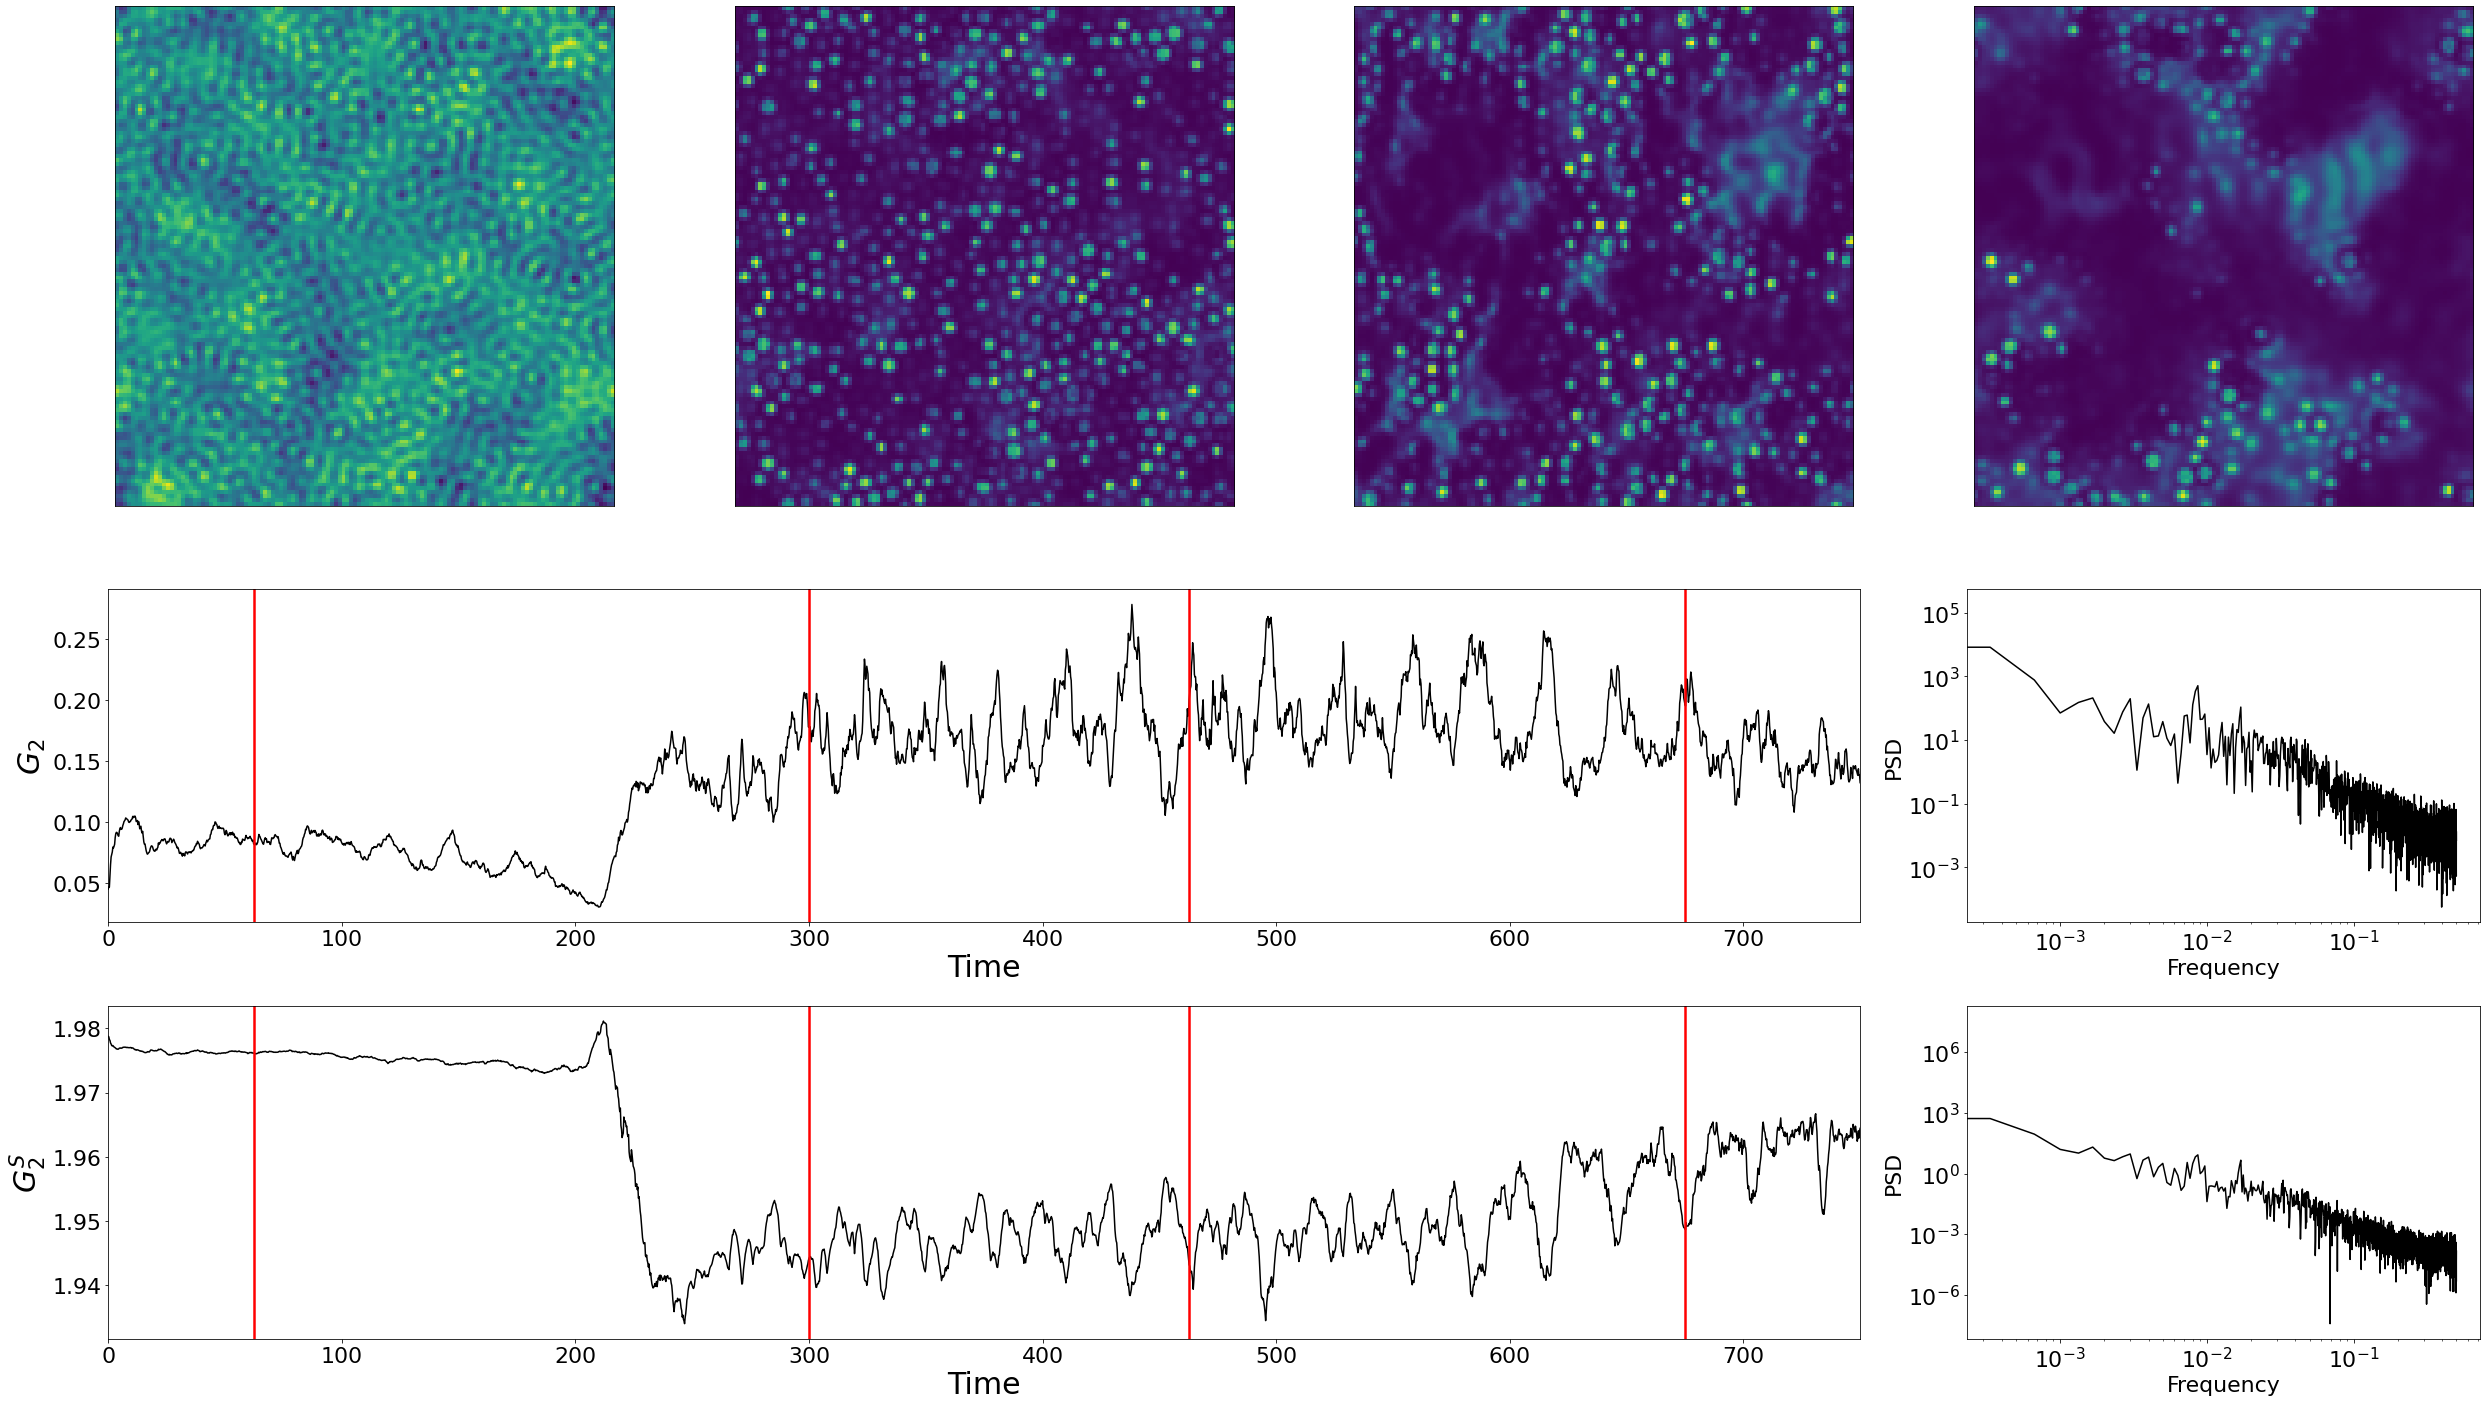

In [7]:
plt.figure(figsize=(35,20))
gs = gridspec.GridSpec(3, 4,height_ratios=[1.5,1.,1.])
x = 0.25*np.arange(0,len(g2a))
matplotlib.rcParams.update({'font.size': 22})

#snapshots: 
plt.subplot(gs[0:1,0])
plt.imshow(data[250,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,1])
plt.imshow(data[1200,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,2])
plt.imshow(data[1850,0])
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0:1,3])
plt.imshow(data[2700,0])
plt.xticks([])
plt.yticks([])

# serie temporal
plt.subplot(gs[1,:3])
#plt.plot(x,g2a)
plt.plot(x,g2a,label="G_2",color='k')
plt.xlim(0,max(x))
plt.axvline(250*0.25,color='r',lw=2.5)
plt.axvline(1200*0.25,color='r',lw=2.5)
plt.axvline(1850*0.25,color='r',lw=2.5)
plt.axvline(2700*0.25,color='r',lw=2.5)
plt.xlabel("Time",fontsize=30)
plt.ylabel("$G_2$",fontsize=30)

# PSD
ax = plt.subplot(gs[1,3])
ax.loglog(freqs[seq],psda[seq],color='k')
plt.ylabel("PSD")
plt.xlabel("Frequency")

# serie temporal
plt.subplot(gs[2,:3])
#plt.plot(x,g2a)
plt.plot(x,g2s,label="G_2",color='k')
plt.xlim(0,max(x))
plt.axvline(250*0.25,color='r',lw=2.5)
plt.axvline(1200*0.25,color='r',lw=2.5)
plt.axvline(1850*0.25,color='r',lw=2.5)
plt.axvline(2700*0.25,color='r',lw=2.5)
plt.xlabel("Time",fontsize=30)
plt.ylabel("$G^S_2$",fontsize=30)

# PSD
plt.subplot(gs[2,3])
plt.loglog(freqs[seq],psds[seq],color='k')
plt.ylabel("PSD")
plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

# A.1. Noise Tests

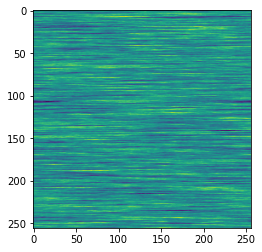

In [37]:
import colorednoise as cn

n = cn.powerlaw_psd_gaussian(exponent=2,size=(256,256))
plt.figure()
plt.imshow(n)
plt.show()

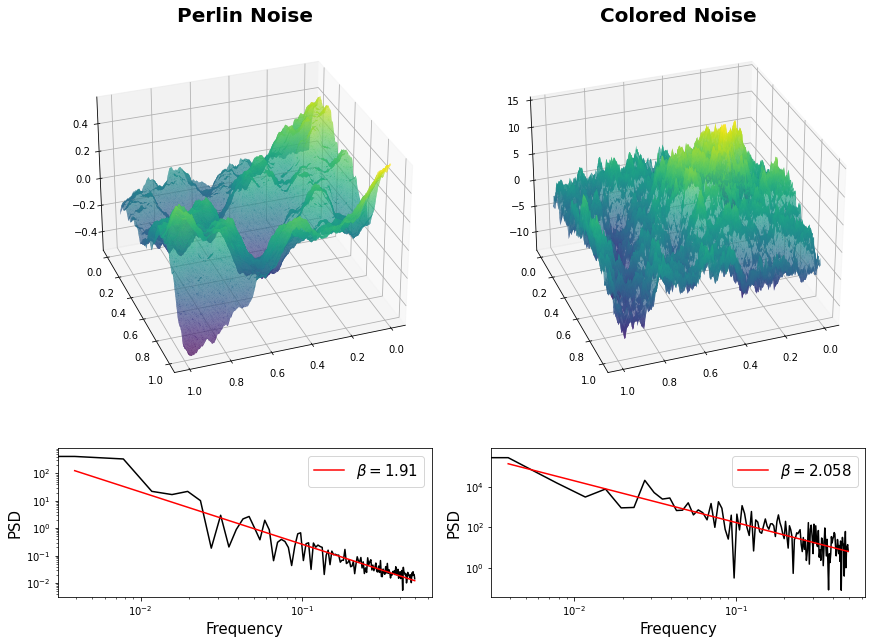

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import noise
import cNoise
import matplotlib.gridspec as gridspec


titleSize = 20
labelSize = 15
roundDecimals = 3
legendSize = 15

############################################################
# Generating Noise
octaves = 16
persistence = 0.5
size = 256
pn = np.zeros((size,size))
for x,i in enumerate(np.linspace(0,1,size)):
    for y, j in enumerate(np.linspace(0,1,size)):
        pn[x,y] = noise.snoise3(0,i,j,octaves=octaves,persistence=persistence)

x,y = np.meshgrid(np.linspace(0,1,size),np.linspace(0,1,size))
x,y = x.reshape(size*size),y.reshape(size*size)
pnSlice = pn[:,size//2].copy()
pn = pn.reshape(size*size)
cn = cNoise.cNoise(2,(size,size))
cnSlice = cn[:,size//2].copy()
cn = cn.reshape(size*size)

##########################################################
# Generating PSD
pnPSD = np.fft.fft(pnSlice)
pnPSD = (pnPSD*np.conj(pnPSD)).real
cnPSD = np.fft.fft(cnSlice)
cnPSD = (cnPSD*np.conj(cnPSD)).real
freqs = np.fft.fftfreq(size)

seq = np.argsort(freqs)
freqs = freqs[seq]
cnPSD = cnPSD[seq]
pnPSD = pnPSD[seq]

#########################################################
# Fitting PSD
ffreq = freqs[freqs>1e-15]
cpn = np.polyfit(np.log(ffreq),np.log(pnPSD[freqs>1e-15]),deg=1)
ccn = np.polyfit(np.log(ffreq),np.log(cnPSD[freqs>1e-15]),deg=1)
fpn = np.exp(np.polyval(cpn,np.log(ffreq)))
fcn = np.exp(np.polyval(ccn,np.log(ffreq)))


##########################################################
# Plot
fig = plt.figure(figsize=(12,9),constrained_layout=True)

spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, height_ratios=[3,1])

ax = fig.add_subplot(spec2[0, 0], projection='3d')
ax.plot_trisurf(x,y,pn,cmap=plt.cm.viridis)
ax.set_title("Perlin Noise",fontsize=titleSize,fontweight="bold")
ax.view_init(30,70)

ax = fig.add_subplot(spec2[1, 0])
ax.loglog(freqs,pnPSD,color='k')
ax.loglog(ffreq,fpn,label=r"$\beta=$"+str(np.round(-cpn[0],roundDecimals)),color='red')
plt.legend(fontsize=legendSize)
ax.set_xlabel("Frequency",fontsize = labelSize)
ax.set_ylabel("PSD",fontsize = labelSize)

ax = fig.add_subplot(spec2[0, 1], projection='3d')
ax.set_title("Colored Noise",fontsize=titleSize,fontweight="bold")
ax.plot_trisurf(x,y,cn,cmap=plt.cm.viridis)
ax.view_init(30,70)

ax = fig.add_subplot(spec2[1, 1])
ax.loglog(freqs,cnPSD,color='k')
ax.loglog(ffreq,fcn,label=r"$\beta=$"+str(np.round(-ccn[0],roundDecimals)),color='red')
plt.legend(fontsize=legendSize)
ax.set_xlabel("Frequency",fontsize = labelSize)
ax.set_ylabel("PSD",fontsize = labelSize)

plt.show()

[ -2.03464667 -70.38096674]


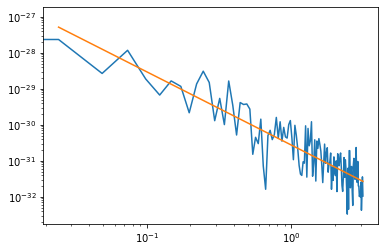

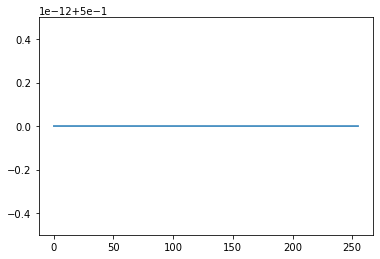

In [3]:
import cNoise
import matplotlib.pyplot as plt
import numpy as np

sample = cNoise.cNoise(2,shape=(256,256,256),std=1e-10)

'''
http://articles.adsabs.harvard.edu//full/1995A%26A...300..707T/0000707.000.html
'''
freq = 2*np.pi*np.fft.fftfreq(len(sample[128,128,:]))
seq = np.argsort(freq)
ftsample = np.fft.fft(sample[128,128,:])

x = freq[seq]
y = (ftsample[seq]*np.conj(ftsample[seq])).real 

coef = np.polyfit(np.log(x[x>1e-15]),np.log(y[x>1e-15]),deg=1)
print(coef)


plt.figure()
plt.loglog(x, y)
fy = np.exp(np.polyval(coef,np.log(x[x>1e-15])))

plt.loglog(x[x>1e-15],  fy)

plt.figure()
plt.plot(sample[128,128,:]+0.5)

plt.show()


[-1.97666101 -9.46102498]


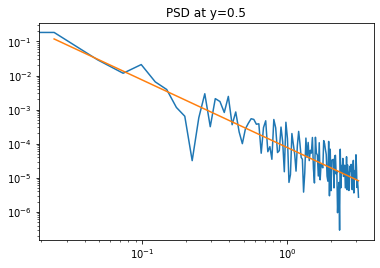

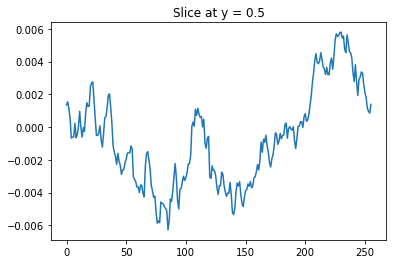

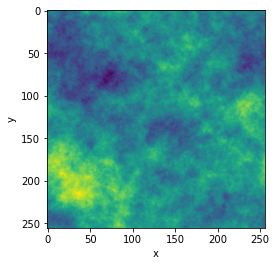

In [13]:
import cNoise
import matplotlib.pyplot as plt
import numpy as np

sample = cNoise.cNoise(2,shape=(256,256))

'''
http://articles.adsabs.harvard.edu//full/1995A%26A...300..707T/0000707.000.html
'''
freq = 2*np.pi*np.fft.fftfreq(len(sample[128,:]))
seq = np.argsort(freq)
ftsample = np.fft.fft(sample[128,:])

x = freq[seq]
y = (ftsample[seq]*np.conj(ftsample[seq])).real 

coef = np.polyfit(np.log(x[x>1e-15]),np.log(y[x>1e-15]),deg=1)
print(coef)


plt.figure()
plt.loglog(x, y)
fy = np.exp(np.polyval(coef,np.log(x[x>1e-15])))
plt.title("PSD at y=0.5")
plt.loglog(x[x>1e-15],  fy)

plt.figure()
plt.plot(sample[128,:])
plt.title("Slice at y = 0.5")

plt.figure()
plt.imshow(sample)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


[-3.14159265 -3.13852469 -3.13545673 ...  3.13238877  3.13545673
  3.13852469]
[-1.98880992 -8.11110452]


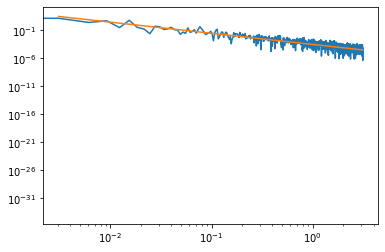

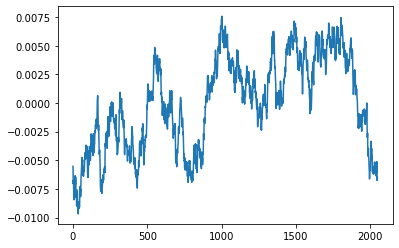

In [2]:
import cNoise
import matplotlib.pyplot as plt
import numpy as np

sample = cNoise.cNoise(2,shape=(2048,))

'''
http://articles.adsabs.harvard.edu//full/1995A%26A...300..707T/0000707.000.html
'''
freq = 2*np.pi*np.fft.fftfreq(len(sample))
seq = np.argsort(freq)
ftsample = np.fft.fft(sample)

x = freq[seq]
y = (ftsample[seq]*np.conj(ftsample[seq])).real 

print(freq[seq])
coef = np.polyfit(np.log(x[x>1e-15]),np.log(y[x>1e-15]),deg=1)
print(coef)


plt.figure()
plt.loglog(x, y)
fy = np.exp(np.polyval(coef,np.log(x[x>1e-15])))

plt.loglog(x[x>1e-15],  fy)

plt.figure()
plt.plot(sample)

plt.show()


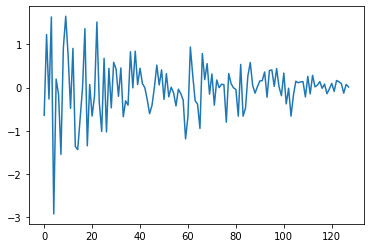

In [2]:
import numpy as np
stds = np.linspace(0.1,0.9,128)[::-1]
ts = np.random.normal(loc=0.0, scale=stds,size=stds.shape)
plt.figure()
plt.plot(ts)
plt.show()

## A.1.Testing other reaction types

In [3]:
# No reaction:
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=0.0,mu_v=0.0,s_u=2.0,s_v=2.0,r=0.0,
#                                          noiseType='colored',mNoise='advection',ic='g')

# Spiral pattern : 

# 'dark matter' like
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2,r=4,s_u=0,s_v=0,e1=0.35,b=0.1,kappa=0.1,
#                                          noiseType='colored',
#                                          mNoise='diffusion',noiseArgs= {'beta':2, 'std':0.01},msize=128)
# 'topological deformation' like
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2,r=4,s_u=0,s_v=0,e1=0.35,b=0.1,kappa=0.0,
#                                          noiseType='colored',
#                                          mNoise='diffusion',noiseArgs= {'beta':2, 'std':0.01},msize=128)


################################################################################################
#thin spiral pattern:
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2.0,s_u=0.0,s_v=0.0,r=4,e1=0.25,b=0.1)
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2.0,s_u=0.0,s_v=2.0,r=4,e1=0.25,b=0.1)
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2.0,s_u=0.0,s_v=0.0,r=4,e1=0.25,b=0.1,
#                                          kappa=0.5, noiseType='gradient',
#                                         mNoise='diffusion',noiseArgs= {'beta':2},msize=128)

################################################################################################
# Source prey, and cobweb predator
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=2.0,s_u=0.0,s_v=0.0,r=2,e1=0.25,e2=0.2,b=0.01)

################################################################################################
# Hex-spiral
#
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=7.5,mu_v=40.0,s_u=0.0,s_v=0.0,r=2,e1=0.3,e2=0.24,b=0.0701,h=12)
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=7.5,mu_v=40.0,s_u=0.0,s_v=0.0,r=1.8,e1=0.3,e2=0.243,b=0.07,h=12)

################################################################################################
# Hotspot
#
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=7.5,mu_v=40.0,s_u=0.0,s_v=0.0,r=2,e1=0.29,e2=0.24,b=0.0701,h=12)

################################################################################################
# Hexagonal
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=7.5,mu_v=40.0,s_u=0.0,s_v=0.0,r=2,e1=0.3,e2=0.25,b=0.0701,h=12)
#
# without advection:
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=6.5,mu_v=40.0,s_u=0.0,s_v=0.0,r=2,e1=0.3,e2=0.25,b=0.0701,h=12)

# simple advection:
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=6.5,mu_v=35.0,s_u=7,s_v=7,r=2,e1=0.3,e2=0.25,b=0.0701,h=12)

# gradient noise advection:
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=6.5,mu_v=35.0,s_u=5,s_v=5,r=2,e1=0.3,e2=0.25,b=0.0701,h=12, 
#                                          noiseType='gradient',noiseArgs={'persistence':0.7})

# colored noise advection
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=7.5,mu_v=40.0,s_u=8.0,s_v=8.8,r=2,e1=0.29,e2=0.24,b=0.0701,h=12, 
#                                          noiseType='colored', mNoise='advection',noiseArgs={'beta':2},kappa=1.0)

#transient waves and voids
#rdb = ReactionNBurguers.ReactionNBurguers(mu_u=7.5,mu_v=35.0,s_u=3.2,s_v=2.8,r=3.65,e1=0.29,e2=0.24,
#                                            b=0.0701,h=12, 
#                                          noiseType='colored', mNoise='advection',noiseArgs={'beta':2},kappa=1.0)